In [1]:
!pip install opencv-python


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPool2D
import cv2


In [3]:
!pip install pygame tensorflow

In [4]:
##getting the data and preprocessing

In [5]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
def plt_input_img(i):
  plt.imshow(X_train[i],cmap='binary')
  plt.xlabel(y_train[i])
  plt.show()

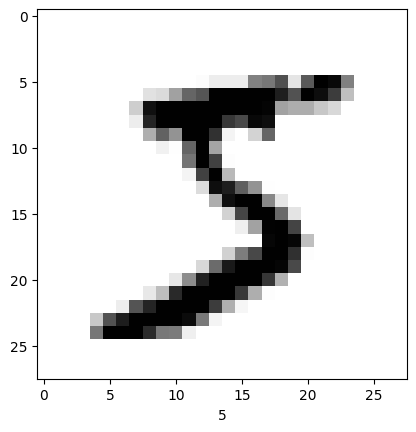

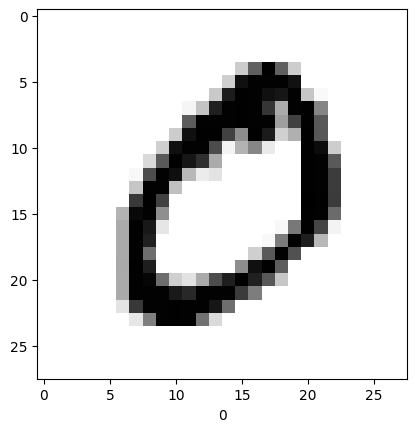

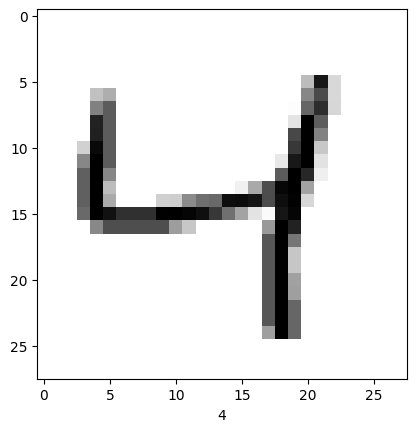

In [7]:
for i in range(3):
  plt_input_img(i)

In [8]:
##preprocess and clean the data for missing and incorrect representation



In [8]:

#The original data set contains 60000 images of size 28*28 pixels. Each pixel is represented by an integer value between 0 and 255. After this transformation,
# each pixel is represented by a floating-point number between 0 and 1.
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255

#expanding from28,28 to 28,28,1 becqase CNN's format of taking images
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)


In [9]:
#doing one hot encoding for all classes
y_train=keras.utils.to_categorical(y_train)

In [10]:
y_test=keras.utils.to_categorical(y_test)

In [11]:
y_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10,activation="linear"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary(
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# EarlyStopping: Stop training if validation accuracy doesn't improve
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01, patience=4, verbose=1)

# ModelCheckpoint: Save the best model based on validation accuracy
mc = ModelCheckpoint('best_model.keras', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# Pass the callbacks to the model.fit function
callbacks = [es, mc]

In [28]:
his = model.fit(X_train,y_train,epochs=5,validation_split=0.3,callbacks=callbacks)

Epoch 1/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8560 - loss: 0.4824
Epoch 1: val_accuracy improved from -inf to 0.97789, saving model to best_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 57s 42ms/step - accuracy: 0.8561 - loss: 0.4820 - val_accuracy: 0.9779 - val_loss: 0.0759
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9727 - loss: 0.0850
Epoch 2: val_accuracy improved from 0.97789 to 0.98256, saving model to best_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 49s 37ms/step - accuracy: 0.9728 - loss: 0.0850 - val_accuracy: 0.9826 - val_loss: 0.0585
Epoch 3/5
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9827 - loss: 0.0574
Epoch 3: val_accuracy improved from 0.98256 to 0.98456, saving model to best_model.keras
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 36ms/step - accuracy: 0.9827 - loss: 0.0574 - val_accuracy: 0.9846 - val_loss: 0.0508
Epoch 4/5
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9867 - loss: 0.0449
Epoch 4: val_accuracy

In [29]:
model_S=keras.models.load_model("/content/best_model.keras")

In [30]:
model_S.save('/content/best_model.h5', save_format='h5')

In [31]:
score=model_S.evaluate(X_test,y_test)
print(f"the model accuracy is {score[1]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9862 - loss: 0.0438
the model accuracy is 0.9884999990463257


In [32]:
from IPython.display import display, HTML, clear_output
from google.colab import output
from google.colab.output import eval_js
from ipywidgets import widgets
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import base64
import io
import cv2

# Load the model
model = load_model('best_model.keras')

# Labels dictionary
LABELS = {0:"Zero", 1:"One", 2:"Two", 3:"Three", 4:"Four", 5:"Five", 6:"Six", 7:"Seven", 8:"Eight", 9:"Nine"}

# HTML and JavaScript for the drawing canvas
html_canvas = """
<canvas id="canvas" width="280" height="280" style="border:1px solid #b9bfc9;margin-top:25px;margin-left:25px;"></canvas>
<script>
var canvas = document.getElementById('canvas');
var ctx = canvas.getContext('2d');
ctx.fillStyle = 'black';
ctx.fillRect(0, 0, canvas.width, canvas.height);
var isDrawing = false;
var lastX = 0;
var lastY = 0;
canvas.addEventListener('mousedown', (e) => {
    isDrawing = true;
    [lastX, lastY] = [e.clientX - canvas.offsetLeft, e.clientY - canvas.offsetTop];
});
canvas.addEventListener('mousemove', draw);
canvas.addEventListener('mouseup', () => isDrawing = false);
function draw(e) {
    if (!isDrawing) return;
    ctx.strokeStyle = 'white';
    ctx.lineWidth = 10;
    ctx.lineCap = 'round';
    ctx.beginPath();
    ctx.moveTo(lastX, lastY);
    ctx.lineTo(e.clientX - canvas.offsetLeft, e.clientY - canvas.offsetTop);
    ctx.stroke();
    [lastX, lastY] = [e.clientX - canvas.offsetLeft, e.clientY - canvas.offsetTop];
}
function clearCanvas() {
    ctx.fillStyle = 'black';
    ctx.fillRect(0, 0, canvas.width, canvas.height);
}
function getImageData() {
    return canvas.toDataURL();
}
</script>
"""

# Display the canvas
display(HTML(html_canvas))

# Function to clear the canvas
def clear_canvas(b):
    eval_js('clearCanvas()')
    prediction_label.value = "Prediction: "

# Function to get image data from canvas
def get_image_data():
    data = eval_js('getImageData()')
    image_data = base64.b64decode(data.split(',')[1])
    image = plt.imread(io.BytesIO(image_data), format='png')
    return image[:,:,0]  # Return only one channel as it's grayscale

# Function to preprocess the image
def preprocess_image(image):
    # Convert to uint8
    image = (image * 255).astype(np.uint8)

    # Find bounding box of the digit
    points = cv2.findNonZero(image)
    x, y, w, h = cv2.boundingRect(points)

    # Crop the image to the bounding box
    cropped = image[y:y+h, x:x+w]

    # Resize to 20x20 while keeping aspect ratio
    resized = cv2.resize(cropped, (20, 20), interpolation=cv2.INTER_AREA)

    # Pad to 28x28
    padded = np.pad(resized, ((4,4), (4,4)), 'constant', constant_values=0)

    # Normalize
    normalized = padded.astype(np.float32) / 255.0

    # Reshape to (1, 28, 28, 1)
    reshaped = normalized.reshape(1, 28, 28, 1)

    return reshaped

# Function to predict the digit
def predict_digit():
    image = get_image_data()
    processed_image = preprocess_image(image)
    prediction = model.predict(processed_image)
    digit = np.argmax(prediction)
    return LABELS[digit], prediction[0][digit]

# Function to make a prediction
def make_prediction(b):
    digit, confidence = predict_digit()
    prediction_label.value = f"Prediction: {digit} (Confidence: {confidence:.2f})"

# Create buttons and labels
clear_button = widgets.Button(description="Clear")
clear_button.on_click(clear_canvas)

predict_button = widgets.Button(description="Predict")
predict_button.on_click(make_prediction)

prediction_label = widgets.Label(value="Prediction: ")

# Display buttons and prediction label
display(widgets.HBox([clear_button, predict_button]))
display(prediction_label)

Label(value='Prediction: ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [22]:
!pip freeze > requirements.txt


NameError: name 'python' is not defined